In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from urllib.parse import urlparse

/Users/Sergey/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [5]:
def count_line_sum(file_name):
    fp = open(file_name,'r',encoding='utf-8',
                 errors='ignore')
    line_count = sum(1 for line in fp)
    return  line_count

In [3]:
data_folder = 'data'
dirlist = os.listdir(data_folder)
dirlist

['RNA_0621_tweets_csv_hashed_2012.csv',
 'RNA_0621_tweets_csv_hashed_2013.csv',
 'russia_052020_tweets_csv_hashed_2.csv',
 '.DS_Store',
 'RNA_0621_tweets_csv_hashed_2017.csv',
 'RNA_0621_tweets_csv_hashed_2016.csv',
 'russia_052020_tweets_csv_hashed_1.csv',
 'RNA_0621_tweets_csv_hashed_2014.csv',
 'RNA_0621_tweets_csv_hashed_2015.csv',
 'russian_linked_tweets_csv_hashed_january_2019.csv',
 'REA_0621_tweets_csv_hashed_2013.csv',
 'REA_0621_tweets_csv_hashed_2012.csv',
 'REA_0621_tweets_csv_hashed_2015.csv',
 'REA_0621_tweets_csv_hashed_2014.csv',
 'REA_0621_tweets_csv_hashed_2016.csv',
 'REA_0621_tweets_csv_hashed_2017.csv',
 'ira_tweets_csv_hashed_october_2018.csv',
 'REA_0621_tweets_csv_hashed_2019.csv',
 'REA_0621_tweets_csv_hashed_2018.csv',
 'REA_0621_tweets_csv_hashed_2020.csv',
 'REA_0621_tweets_csv_hashed_2021.csv',
 'ira_tweets_csv_hashed_september_2020.csv',
 'russia__IRA_tweets_csv_hashed_february_2021.csv',
 'russia_tweets_csv_hashed_june_2019.csv',
 'RNA_0621_tweets_csv_has

In [6]:
russia_dicts = {}
#rows_n = []
for i in dirlist:
    #rows_n.append(count_line_sum(os.path.join('data','Russia_East_Africa_december_2021',i)))
    russia_dicts[i] = count_line_sum(os.path.join(data_folder,i))

In [7]:
russia_dicts

{'RNA_0621_tweets_csv_hashed_2012.csv': 4,
 'RNA_0621_tweets_csv_hashed_2013.csv': 19,
 'russia_052020_tweets_csv_hashed_2.csv': 417352,
 '.DS_Store': 1,
 'RNA_0621_tweets_csv_hashed_2017.csv': 6,
 'RNA_0621_tweets_csv_hashed_2016.csv': 1,
 'russia_052020_tweets_csv_hashed_1.csv': 3956803,
 'RNA_0621_tweets_csv_hashed_2014.csv': 20,
 'RNA_0621_tweets_csv_hashed_2015.csv': 2,
 'russian_linked_tweets_csv_hashed_january_2019.csv': 1831444,
 'REA_0621_tweets_csv_hashed_2013.csv': 6,
 'REA_0621_tweets_csv_hashed_2012.csv': 2,
 'REA_0621_tweets_csv_hashed_2015.csv': 13,
 'REA_0621_tweets_csv_hashed_2014.csv': 11,
 'REA_0621_tweets_csv_hashed_2016.csv': 2,
 'REA_0621_tweets_csv_hashed_2017.csv': 9,
 'ira_tweets_csv_hashed_october_2018.csv': 1826346,
 'REA_0621_tweets_csv_hashed_2019.csv': 11581,
 'REA_0621_tweets_csv_hashed_2018.csv': 155,
 'REA_0621_tweets_csv_hashed_2020.csv': 4742,
 'REA_0621_tweets_csv_hashed_2021.csv': 38,
 'ira_tweets_csv_hashed_september_2020.csv': 3720,
 'russia__IRA_

In [12]:
del russia_dicts['.DS_Store']

In [13]:
russia_dicts

{'RNA_0621_tweets_csv_hashed_2012.csv': 4,
 'RNA_0621_tweets_csv_hashed_2013.csv': 19,
 'russia_052020_tweets_csv_hashed_2.csv': 417352,
 'RNA_0621_tweets_csv_hashed_2017.csv': 6,
 'RNA_0621_tweets_csv_hashed_2016.csv': 1,
 'russia_052020_tweets_csv_hashed_1.csv': 3956803,
 'RNA_0621_tweets_csv_hashed_2014.csv': 20,
 'RNA_0621_tweets_csv_hashed_2015.csv': 2,
 'russian_linked_tweets_csv_hashed_january_2019.csv': 1831444,
 'REA_0621_tweets_csv_hashed_2013.csv': 6,
 'REA_0621_tweets_csv_hashed_2012.csv': 2,
 'REA_0621_tweets_csv_hashed_2015.csv': 13,
 'REA_0621_tweets_csv_hashed_2014.csv': 11,
 'REA_0621_tweets_csv_hashed_2016.csv': 2,
 'REA_0621_tweets_csv_hashed_2017.csv': 9,
 'ira_tweets_csv_hashed_october_2018.csv': 1826346,
 'REA_0621_tweets_csv_hashed_2019.csv': 11581,
 'REA_0621_tweets_csv_hashed_2018.csv': 155,
 'REA_0621_tweets_csv_hashed_2020.csv': 4742,
 'REA_0621_tweets_csv_hashed_2021.csv': 38,
 'ira_tweets_csv_hashed_september_2020.csv': 3720,
 'russia__IRA_tweets_csv_hashed

In [32]:
russia_dicts['ira_tweets_csv_hashed_october_2018.csv'] = 1826344

In [33]:
data = pd.DataFrame()

In [34]:
for key, value in russia_dicts.items():
    df = pd.read_csv(os.path.join(data_folder, key), nrows=value, parse_dates=['tweet_time'])
    #df = pd.read_csv(os.path.join('data/Russia_East_Africa_december_2021', key), nrows = value, parse_dates=['tweet_time'])
    df = df[['tweetid','userid','tweet_time','urls']]
    print(f'{key}: ', len(df))
    data = pd.concat([data, df])
    print('Dataframe: ', len(data))

RNA_0621_tweets_csv_hashed_2012.csv:  3
Dataframe:  3
RNA_0621_tweets_csv_hashed_2013.csv:  18
Dataframe:  21


/var/folders/qj/yzbtrl8d3v1d1kcls_9thcs80000gn/T/ipykernel_97168/997485915.py:2: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(data_folder, key), nrows=value, parse_dates=['tweet_time'])


russia_052020_tweets_csv_hashed_2.csv:  306303
Dataframe:  306324
RNA_0621_tweets_csv_hashed_2017.csv:  5
Dataframe:  306329
RNA_0621_tweets_csv_hashed_2016.csv:  0
Dataframe:  306329


/var/folders/qj/yzbtrl8d3v1d1kcls_9thcs80000gn/T/ipykernel_97168/997485915.py:2: DtypeWarning: Columns (15,19) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(data_folder, key), nrows=value, parse_dates=['tweet_time'])


russia_052020_tweets_csv_hashed_1.csv:  3128489
Dataframe:  3434818
RNA_0621_tweets_csv_hashed_2014.csv:  18
Dataframe:  3434836
RNA_0621_tweets_csv_hashed_2015.csv:  1
Dataframe:  3434837


/var/folders/qj/yzbtrl8d3v1d1kcls_9thcs80000gn/T/ipykernel_97168/997485915.py:2: DtypeWarning: Columns (15,19) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(data_folder, key), nrows=value, parse_dates=['tweet_time'])


russian_linked_tweets_csv_hashed_january_2019.csv:  920761
Dataframe:  4355598
REA_0621_tweets_csv_hashed_2013.csv:  4
Dataframe:  4355602
REA_0621_tweets_csv_hashed_2012.csv:  1
Dataframe:  4355603
REA_0621_tweets_csv_hashed_2015.csv:  3
Dataframe:  4355606
REA_0621_tweets_csv_hashed_2014.csv:  8
Dataframe:  4355614
REA_0621_tweets_csv_hashed_2016.csv:  1
Dataframe:  4355615
REA_0621_tweets_csv_hashed_2017.csv:  5
Dataframe:  4355620


/var/folders/qj/yzbtrl8d3v1d1kcls_9thcs80000gn/T/ipykernel_97168/997485915.py:2: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(data_folder, key), nrows=value, parse_dates=['tweet_time'])


ira_tweets_csv_hashed_october_2018.csv:  1826344
Dataframe:  6181964
REA_0621_tweets_csv_hashed_2019.csv:  5975
Dataframe:  6187939
REA_0621_tweets_csv_hashed_2018.csv:  117
Dataframe:  6188056
REA_0621_tweets_csv_hashed_2020.csv:  1586
Dataframe:  6189642
REA_0621_tweets_csv_hashed_2021.csv:  23
Dataframe:  6189665
ira_tweets_csv_hashed_september_2020.csv:  1368
Dataframe:  6191033


/var/folders/qj/yzbtrl8d3v1d1kcls_9thcs80000gn/T/ipykernel_97168/997485915.py:2: DtypeWarning: Columns (15,19) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(data_folder, key), nrows=value, parse_dates=['tweet_time'])


russia__IRA_tweets_csv_hashed_february_2021.csv:  68914
Dataframe:  6259947
russia_tweets_csv_hashed_june_2019.csv:  3
Dataframe:  6259950
RNA_0621_tweets_csv_hashed_2018.csv:  13
Dataframe:  6259963
RNA_0621_tweets_csv_hashed_2019.csv:  4609
Dataframe:  6264572
russia_GRU_tweets_csv_hashed_february_2021.csv:  26684
Dataframe:  6291256
RNA_0621_tweets_csv_hashed_2020.csv:  14291
Dataframe:  6305547


In [35]:
data

,tweetid,userid,tweet_time,urls
0,269795552563191808,F05zyhmf5zjcBKHB1v3qH1MWcwhc0qj4YhEnEPEuU0=,2012-11-17 13:34:00,['http://www.gq.com/moty/2012/rihanna-cover-st...
1,281120941067612161,F05zyhmf5zjcBKHB1v3qH1MWcwhc0qj4YhEnEPEuU0=,2012-12-18 19:37:00,['http://bit.ly/Vjof6l']
2,248832945526284288,F05zyhmf5zjcBKHB1v3qH1MWcwhc0qj4YhEnEPEuU0=,2012-09-20 17:16:00,['http://ow.ly/dRFNQ']
0,365082069254156288,FDAiQiDNukYhjuXtuoj8oXCk9DaeuDk6dWKCID+Kscc=,2013-08-07 12:08:00,NaN
1,376047909948882945,FDAiQiDNukYhjuXtuoj8oXCk9DaeuDk6dWKCID+Kscc=,2013-09-06 18:23:00,['http://ow.ly/oDnGq']
...,...,...,...,...
14286,1278972306476412928,Uc1iIo5iOu1wFZlGe0GlzSIi7hyi8wPV8TCKNEQmus=,2020-07-03 08:42:00,[]
14287,1243547854477672449,Uc1iIo5iOu1wFZlGe0GlzSIi7hyi8wPV8TCKNEQmus=,2020-03-27 14:38:00,[]
14288,1259793825742106626,QfHsWu0gMUdhB5YjAUVDoD9lx7QFvDRje6G7YigUVE4=,2020-05-11 10:33:00,[]
14289,1238076459341750275,Uc1iIo5iOu1wFZlGe0GlzSIi7hyi8wPV8TCKNEQmus=,2020-03-12 12:16:00,[]


In [36]:
data['urls'] = data['urls'].str[1:-1]

In [37]:
data

,tweetid,userid,tweet_time,urls
0,269795552563191808,F05zyhmf5zjcBKHB1v3qH1MWcwhc0qj4YhEnEPEuU0=,2012-11-17 13:34:00,'http://www.gq.com/moty/2012/rihanna-cover-sto...
1,281120941067612161,F05zyhmf5zjcBKHB1v3qH1MWcwhc0qj4YhEnEPEuU0=,2012-12-18 19:37:00,'http://bit.ly/Vjof6l'
2,248832945526284288,F05zyhmf5zjcBKHB1v3qH1MWcwhc0qj4YhEnEPEuU0=,2012-09-20 17:16:00,'http://ow.ly/dRFNQ'
0,365082069254156288,FDAiQiDNukYhjuXtuoj8oXCk9DaeuDk6dWKCID+Kscc=,2013-08-07 12:08:00,NaN
1,376047909948882945,FDAiQiDNukYhjuXtuoj8oXCk9DaeuDk6dWKCID+Kscc=,2013-09-06 18:23:00,'http://ow.ly/oDnGq'
...,...,...,...,...
14286,1278972306476412928,Uc1iIo5iOu1wFZlGe0GlzSIi7hyi8wPV8TCKNEQmus=,2020-07-03 08:42:00,
14287,1243547854477672449,Uc1iIo5iOu1wFZlGe0GlzSIi7hyi8wPV8TCKNEQmus=,2020-03-27 14:38:00,
14288,1259793825742106626,QfHsWu0gMUdhB5YjAUVDoD9lx7QFvDRje6G7YigUVE4=,2020-05-11 10:33:00,
14289,1238076459341750275,Uc1iIo5iOu1wFZlGe0GlzSIi7hyi8wPV8TCKNEQmus=,2020-03-12 12:16:00,


In [39]:
data.dropna(inplace=True)

In [40]:
data

,tweetid,userid,tweet_time,urls
0,269795552563191808,F05zyhmf5zjcBKHB1v3qH1MWcwhc0qj4YhEnEPEuU0=,2012-11-17 13:34:00,'http://www.gq.com/moty/2012/rihanna-cover-sto...
1,281120941067612161,F05zyhmf5zjcBKHB1v3qH1MWcwhc0qj4YhEnEPEuU0=,2012-12-18 19:37:00,'http://bit.ly/Vjof6l'
2,248832945526284288,F05zyhmf5zjcBKHB1v3qH1MWcwhc0qj4YhEnEPEuU0=,2012-09-20 17:16:00,'http://ow.ly/dRFNQ'
1,376047909948882945,FDAiQiDNukYhjuXtuoj8oXCk9DaeuDk6dWKCID+Kscc=,2013-09-06 18:23:00,'http://ow.ly/oDnGq'
2,351787481710080000,FDAiQiDNukYhjuXtuoj8oXCk9DaeuDk6dWKCID+Kscc=,2013-07-01 19:40:00,
...,...,...,...,...
14286,1278972306476412928,Uc1iIo5iOu1wFZlGe0GlzSIi7hyi8wPV8TCKNEQmus=,2020-07-03 08:42:00,
14287,1243547854477672449,Uc1iIo5iOu1wFZlGe0GlzSIi7hyi8wPV8TCKNEQmus=,2020-03-27 14:38:00,
14288,1259793825742106626,QfHsWu0gMUdhB5YjAUVDoD9lx7QFvDRje6G7YigUVE4=,2020-05-11 10:33:00,
14289,1238076459341750275,Uc1iIo5iOu1wFZlGe0GlzSIi7hyi8wPV8TCKNEQmus=,2020-03-12 12:16:00,


In [41]:
data['urls'] = data['urls'].str[1:-1]

In [42]:
data

,tweetid,userid,tweet_time,urls
0,269795552563191808,F05zyhmf5zjcBKHB1v3qH1MWcwhc0qj4YhEnEPEuU0=,2012-11-17 13:34:00,http://www.gq.com/moty/2012/rihanna-cover-stor...
1,281120941067612161,F05zyhmf5zjcBKHB1v3qH1MWcwhc0qj4YhEnEPEuU0=,2012-12-18 19:37:00,http://bit.ly/Vjof6l
2,248832945526284288,F05zyhmf5zjcBKHB1v3qH1MWcwhc0qj4YhEnEPEuU0=,2012-09-20 17:16:00,http://ow.ly/dRFNQ
1,376047909948882945,FDAiQiDNukYhjuXtuoj8oXCk9DaeuDk6dWKCID+Kscc=,2013-09-06 18:23:00,http://ow.ly/oDnGq
2,351787481710080000,FDAiQiDNukYhjuXtuoj8oXCk9DaeuDk6dWKCID+Kscc=,2013-07-01 19:40:00,
...,...,...,...,...
14286,1278972306476412928,Uc1iIo5iOu1wFZlGe0GlzSIi7hyi8wPV8TCKNEQmus=,2020-07-03 08:42:00,
14287,1243547854477672449,Uc1iIo5iOu1wFZlGe0GlzSIi7hyi8wPV8TCKNEQmus=,2020-03-27 14:38:00,
14288,1259793825742106626,QfHsWu0gMUdhB5YjAUVDoD9lx7QFvDRje6G7YigUVE4=,2020-05-11 10:33:00,
14289,1238076459341750275,Uc1iIo5iOu1wFZlGe0GlzSIi7hyi8wPV8TCKNEQmus=,2020-03-12 12:16:00,


In [43]:
data = data[data['urls'] != '']

In [44]:
data

,tweetid,userid,tweet_time,urls
0,269795552563191808,F05zyhmf5zjcBKHB1v3qH1MWcwhc0qj4YhEnEPEuU0=,2012-11-17 13:34:00,http://www.gq.com/moty/2012/rihanna-cover-stor...
1,281120941067612161,F05zyhmf5zjcBKHB1v3qH1MWcwhc0qj4YhEnEPEuU0=,2012-12-18 19:37:00,http://bit.ly/Vjof6l
2,248832945526284288,F05zyhmf5zjcBKHB1v3qH1MWcwhc0qj4YhEnEPEuU0=,2012-09-20 17:16:00,http://ow.ly/dRFNQ
1,376047909948882945,FDAiQiDNukYhjuXtuoj8oXCk9DaeuDk6dWKCID+Kscc=,2013-09-06 18:23:00,http://ow.ly/oDnGq
5,353418303718440961,FDAiQiDNukYhjuXtuoj8oXCk9DaeuDk6dWKCID+Kscc=,2013-07-06 07:41:00,http://shar.es/A6OUP
...,...,...,...,...
14153,1214198784055545856,bNO7ey5HADuZDOHck3BjCy4ICubjYqkOmmTJZ+C2po4=,2020-01-06 14:55:00,https://habarirdc.net/savourer-delicieuses-sau...
14168,1324733585966944258,Kms+x6qFsjBkCSCWZdXRU0wEul1HVMpX2nTRl8S2+IY=,2020-11-06 15:21:00,https://ajel.sa/KVtC5S/
14189,1325773129151619074,k67xbLRsLJyAVjTJOZI9QmmdPzOUCU1vWrg1ZFbRa8=,2020-11-09 12:12:00,https://twitter.com/richimedhurst/status/13256...
14247,1304461702604361728,k67xbLRsLJyAVjTJOZI9QmmdPzOUCU1vWrg1ZFbRa8=,2020-09-11 16:48:00,https://twitter.com/DashCamTwats/status/130398...


In [47]:
data.reset_index(inplace=True)
data.drop(columns=['index'], inplace=True)

/var/folders/qj/yzbtrl8d3v1d1kcls_9thcs80000gn/T/ipykernel_97168/1430549145.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns=['index'], inplace=True)


In [48]:
data['new_urls'] = ''

for index in data.index:
    data.loc[index,'new_urls'] = urlparse(data.loc[index,'urls']).hostname

data['new_urls'] = data['new_urls'].astype(str)

/var/folders/qj/yzbtrl8d3v1d1kcls_9thcs80000gn/T/ipykernel_97168/1679812325.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['new_urls'] = ''
/var/folders/qj/yzbtrl8d3v1d1kcls_9thcs80000gn/T/ipykernel_97168/1679812325.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['new_urls'] = data['new_urls'].astype(str)


In [49]:
data['new_urls'].value_counts(ascending=False)

dlvr.it                    467992
bit.ly                     401632
goo.gl                     165975
twitter.com                153989
riafan.ru                  102963
                            ...  
www.hotgas.net                  1
www.prepperfortress.com         1
www.vandashop.com               1
freepress.org                   1
ajel.sa                         1
Name: new_urls, Length: 35519, dtype: int64

## Clean Dataset

In [50]:
df = data.copy()

In [51]:
df = df[df.new_urls != 'bit.ly']
df = df[df.new_urls != 'goo.gl']
df = df[df.new_urls != 'dlvr.it']
df = df[df.new_urls != 'j.mp']
df = df[df.new_urls != 'ift.tt']
df = df[df.new_urls != 'ow.ly']
df = df[df.new_urls != 'ali.pub']

In [55]:
df.new_urls.value_counts()

twitter.com                153989
riafan.ru                  102963
vk.cc                       31491
www.gazeta.ru               30697
youtu.be                    28935
                            ...  
www.hotgas.net                  1
www.prepperfortress.com         1
www.vandashop.com               1
freepress.org                   1
ajel.sa                         1
Name: new_urls, Length: 35512, dtype: int64

## Aggregation

In [58]:
dates_data = df.groupby([df.tweet_time.dt.year, df.tweet_time.dt.month])['new_urls'].count()

<Axes: xlabel='Year, Month, Day', ylabel='Number of tweets'>

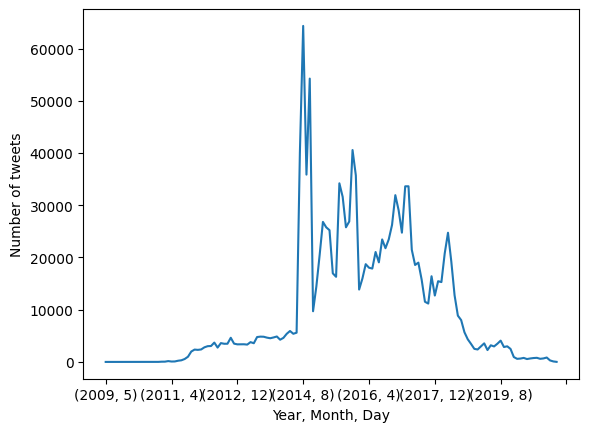

In [59]:
dates_data.plot(xlabel = 'Year, Month, Day', ylabel='Number of tweets')

## Classification

In [60]:
df['category'] = ''

In [61]:
russian_prop_filter = (df['new_urls'].str.contains('rbc.ru')) | (df['new_urls'].str.contains('russian.rt.com')) | (df['new_urls'].str.contains('on.rt.com')) | (df['new_urls'].str.contains('1tv.ru')) | (df['new_urls'].str.contains('riafan')) | (df['new_urls'].str.contains('gazeta.ru')) | (df['new_urls'].str.contains('ria.ru')) | (df['new_urls'].str.contains('tass.ru')) | (df['new_urls'].str.contains('newinform.com')) | (df['new_urls'].str.contains('inforeactor.ru')) | (df['new_urls'].str.contains('inforeactor.ru')) | (df['new_urls'].str.contains('emaindan.com.ua')) | (df['new_urls'].str.contains('kiev-news.com')) | (df['new_urls'].str.contains('kievsmi.net')) | (df['new_urls'].str.contains('kievsmi.net')) | (df['new_urls'].str.contains('rusnovosti.ru')) | (df['new_urls'].str.contains('nahnews.com.ua')) | (df['new_urls'].str.contains('vesti.ru')) | (df['new_urls'].str.contains('fapnews.ru')) | (df['new_urls'].str.contains('lifenews.ru')) | (df['new_urls'].str.contains('news.yandex.ru')) 

russian_ind_filter = (df['new_urls'].str.contains('tvrain.ru')) | (df['new_urls'].str.contains('meduza.io'))

russian_sm_filter = (df['new_urls'].str.contains('livejournal.com')) | (df['new_urls'].str.contains('vk.com')) | (df['new_urls'].str.contains('vk.cc')) | (df['new_urls'].str.contains('ask.fm'))

df.loc[russian_prop_filter, 'category'] = 'Russian_Propaganda_Media'
df.loc[russian_ind_filter, 'category'] = 'Russian_Independent_Media'
df.loc[russian_sm_filter, 'category'] = 'Russian_Social_Media'

us_sm_filter = (df['new_urls'].str.contains('facebook.com')) | (df['new_urls'].str.contains('fb.me')) | (df['new_urls'].str.contains('twitter.com')) | (df['new_urls'].str.contains('instagram.com')) | (df['new_urls'].str.contains('instagr.am'))

df.loc[us_sm_filter, 'category'] = 'US_Social_Media'

video_host_filter = (df['new_urls'].str.contains('youtube.com')) | (df['new_urls'].str.contains('youtu.be')) | ((df['new_urls'].str.contains('vine.co')) & (df['new_urls'] != ('www.godvine.com'))) | (df['new_urls'].str.contains('vimeo.com')) 

df.loc[video_host_filter, 'category'] = 'Video_Hosting_Website'

abc = ['abc7news.com', 'abc7.com']
cnn = ['cnn.com', 'cnn.it']
fox = ['www.fox5atlanta.com', 'www.foxla.com', 'www.foxnews.com']
cbs = ['sanfrancisco.cbslocal.com','miami.cbslocal.com','philadelphia.cbslocal.com','cbsloc.al',
'chicago.cbslocal.com','baltimore.cbslocal.com','www.cbs8.com','www.cbs46.com']
nbc = ['www.nbcdfw.com','www.nbcchicago.com','www.nbcwashington.com','www.nbcnewyork.com',
'www.nbcphiladelphia.com','www.nbcsandiego.com','nbcnews.to','www.nbcbayarea.com']
other = ['washingtonpost.com',' www.usatoday.com', 'cbs', 'www.theguardian.com', 'on.wsj.com', 'www.buzzfeed.com', 'www.reuters.com']
am_maj_news = [abc, cnn, fox, cbs, nbc, other]

for ls in am_maj_news:
    for media in ls:
        df.loc[df['new_urls'].str.contains(media), 'category'] = 'US_Big_Media'

local_news = ['www.cleveland19.com','www.cleveland.com','chicagotribune.com','detroitnews.com','www.baltimoresun.com']
for media in local_news:
    df.loc[df['new_urls'].str.contains(media), 'category'] = 'US_Local_Media'

uk_news = ['bbc.in','dailymail.co.uk']
for media in uk_news:
    df.loc[df['new_urls'].str.contains(media), 'category'] = 'UK_Media'

In [62]:
df.category.value_counts(normalize=True)

                             0.478112
Russian_Propaganda_Media     0.182354
US_Social_Media              0.149502
Russian_Social_Media         0.109841
Video_Hosting_Website        0.047588
US_Big_Media                 0.017611
Russian_Independent_Media    0.005945
US_Local_Media               0.005552
UK_Media                     0.003495
Name: category, dtype: float64

In [63]:
df

,tweetid,userid,tweet_time,urls,new_urls,category
0,269795552563191808,F05zyhmf5zjcBKHB1v3qH1MWcwhc0qj4YhEnEPEuU0=,2012-11-17 13:34:00,http://www.gq.com/moty/2012/rihanna-cover-stor...,www.gq.com,
4,353418303718440961,FDAiQiDNukYhjuXtuoj8oXCk9DaeuDk6dWKCID+Kscc=,2013-07-06 07:41:00,http://shar.es/A6OUP,shar.es,
5,367158974702825472,FDAiQiDNukYhjuXtuoj8oXCk9DaeuDk6dWKCID+Kscc=,2013-08-13 05:41:00,http://www.newsday.co.zw/2013/08/13/zifa-engag...,www.newsday.co.zw,
6,899263418393395200,3404278978,2017-08-20 13:34:00,https://im-moscow.ru/about/windows,im-moscow.ru,
7,989765727698612224,3404278978,2018-04-27 07:18:00,https://im-moscow.ru/about/landscape,im-moscow.ru,
...,...,...,...,...,...,...
2463712,1214198784055545856,bNO7ey5HADuZDOHck3BjCy4ICubjYqkOmmTJZ+C2po4=,2020-01-06 14:55:00,https://habarirdc.net/savourer-delicieuses-sau...,habarirdc.net,
2463713,1324733585966944258,Kms+x6qFsjBkCSCWZdXRU0wEul1HVMpX2nTRl8S2+IY=,2020-11-06 15:21:00,https://ajel.sa/KVtC5S/,ajel.sa,
2463714,1325773129151619074,k67xbLRsLJyAVjTJOZI9QmmdPzOUCU1vWrg1ZFbRa8=,2020-11-09 12:12:00,https://twitter.com/richimedhurst/status/13256...,twitter.com,US_Social_Media
2463715,1304461702604361728,k67xbLRsLJyAVjTJOZI9QmmdPzOUCU1vWrg1ZFbRa8=,2020-09-11 16:48:00,https://twitter.com/DashCamTwats/status/130398...,twitter.com,US_Social_Media


In [64]:
df.reset_index(inplace=True)
df.drop(columns=['index'], inplace=True)

In [66]:
for i in df.index:
    if df.loc[i, 'category'] == '':
        df.loc[i, 'category'] = 'Unidentified'

In [68]:
df.category.value_counts(normalize=True)

Unidentified                 0.478112
Russian_Propaganda_Media     0.182354
US_Social_Media              0.149502
Russian_Social_Media         0.109841
Video_Hosting_Website        0.047588
US_Big_Media                 0.017611
Russian_Independent_Media    0.005945
US_Local_Media               0.005552
UK_Media                     0.003495
Name: category, dtype: float64

## Aggregation by Category

In [69]:
dates_data_day = df.groupby([df.tweet_time.dt.year, df.tweet_time.dt.month, df.tweet_time.dt.day, 'category'])['new_urls'].count()

In [70]:
dates_df_day = dates_data_day.to_frame()

In [71]:
dates_df_day

new_urls
tweet_time tweet_time tweet_time category              
2009       5          19         Unidentified         1
           8          25         Unidentified         1
                      28         Unidentified         1
           10         2          Unidentified         1
           11         9          Unidentified         1
...                                                 ...
2021       3          11         Unidentified         2
                      12         Unidentified         2
                      15         Unidentified         2
                      16         Unidentified         2
                      17         Unidentified         3

[19816 rows x 1 columns]

In [72]:
dates_df_day.reset_index(level='category', inplace=True)

In [73]:
dates_df_day

category  new_urls
tweet_time tweet_time tweet_time                        
2009       5          19          Unidentified         1
           8          25          Unidentified         1
                      28          Unidentified         1
           10         2           Unidentified         1
           11         9           Unidentified         1
...                                        ...       ...
2021       3          11          Unidentified         2
                      12          Unidentified         2
                      15          Unidentified         2
                      16          Unidentified         2
                      17          Unidentified         3

[19816 rows x 2 columns]

In [74]:
dates_df_day.columns = ['category', 'count']

In [75]:
pivot_df_day = dates_df_day.pivot(columns = 'category', values = 'count')
pivot_df_day

category                          Russian_Independent_Media  \
tweet_time tweet_time tweet_time                              
2009       5          19                                NaN   
           8          25                                NaN   
                      28                                NaN   
           10         2                                 NaN   
           11         9                                 NaN   
...                                                     ...   
2021       3          11                                NaN   
                      12                                NaN   
                      15                                NaN   
                      16                                NaN   
                      17                                NaN   

category                          Russian_Propaganda_Media  \
tweet_time tweet_time tweet_time                             
2009       5          19                               NaN   
           8          25                               NaN   
                      28                               NaN   
           10         2                                NaN   
           11         9                                NaN   
...                                                    ...   
2021       3          11                               NaN   
                      12                               NaN   
                      15                               NaN   
                      16                               NaN   
                      17                               NaN   

category                          Russian_Social_Media  UK_Media  \
tweet_time tweet_time tweet_time                                   
2009       5          19                           NaN       NaN   
           8          25                           NaN       NaN   
                      28                           NaN       NaN   
           10         2                            NaN       NaN   
           11         9                            NaN       NaN   
...                                                ...       ...   
2021       3          11                           NaN       NaN   
                      12                           NaN       NaN   
                      15                           NaN       NaN   
                      16                           NaN       NaN   
                      17                           NaN       NaN   

category                          US_Big_Media  US_Local_Media  \
tweet_time tweet_time tweet_time                                 
2009       5          19                   NaN             NaN   
           8          25                   NaN             NaN   
                      28                   NaN             NaN   
           10         2                    NaN             NaN   
           11         9                    NaN             NaN   
...                                        ...             ...   
2021       3          11                   NaN             NaN   
                      12                   NaN             NaN   
                      15                   NaN             NaN   
                      16                   NaN             NaN   
                      17                   NaN             NaN   

category                          US_Social_Media  Unidentified  \
tweet_time tweet_time tweet_time                                  
2009       5          19                      NaN           1.0   
           8          25                      NaN           1.0   
                      28                      NaN           1.0   
           10         2                       NaN           1.0   
           11         9                       NaN           1.0   
...                                           ...           ...   
2021       3          11                      NaN           2.0   
                      12  

In [76]:
pivot_df_day = pivot_df_day.fillna(0)

In [77]:
pivot_df_day

category                          Russian_Independent_Media  \
tweet_time tweet_time tweet_time                              
2009       5          19                                0.0   
           8          25                                0.0   
                      28                                0.0   
           10         2                                 0.0   
           11         9                                 0.0   
...                                                     ...   
2021       3          11                                0.0   
                      12                                0.0   
                      15                                0.0   
                      16                                0.0   
                      17                                0.0   

category                          Russian_Propaganda_Media  \
tweet_time tweet_time tweet_time                             
2009       5          19                               0.0   
           8          25                               0.0   
                      28                               0.0   
           10         2                                0.0   
           11         9                                0.0   
...                                                    ...   
2021       3          11                               0.0   
                      12                               0.0   
                      15                               0.0   
                      16                               0.0   
                      17                               0.0   

category                          Russian_Social_Media  UK_Media  \
tweet_time tweet_time tweet_time                                   
2009       5          19                           0.0       0.0   
           8          25                           0.0       0.0   
                      28                           0.0       0.0   
           10         2                            0.0       0.0   
           11         9                            0.0       0.0   
...                                                ...       ...   
2021       3          11                           0.0       0.0   
                      12                           0.0       0.0   
                      15                           0.0       0.0   
                      16                           0.0       0.0   
                      17                           0.0       0.0   

category                          US_Big_Media  US_Local_Media  \
tweet_time tweet_time tweet_time                                 
2009       5          19                   0.0             0.0   
           8          25                   0.0             0.0   
                      28                   0.0             0.0   
           10         2                    0.0             0.0   
           11         9                    0.0             0.0   
...                                        ...             ...   
2021       3          11                   0.0             0.0   
                      12                   0.0             0.0   
                      15                   0.0             0.0   
                      16                   0.0             0.0   
                      17                   0.0             0.0   

category                          US_Social_Media  Unidentified  \
tweet_time tweet_time tweet_time                                  
2009       5          19                      0.0           1.0   
           8          25                      0.0           1.0   
                      28                      0.0           1.0   
           10         2                       0.0           1.0   
           11         9                       0.0           1.0   
...                                           ...           ...   
2021       3          11                      0.0           2.0   
                      12  

## Plotting

<Axes: xlabel='tweet_time,tweet_time,tweet_time'>

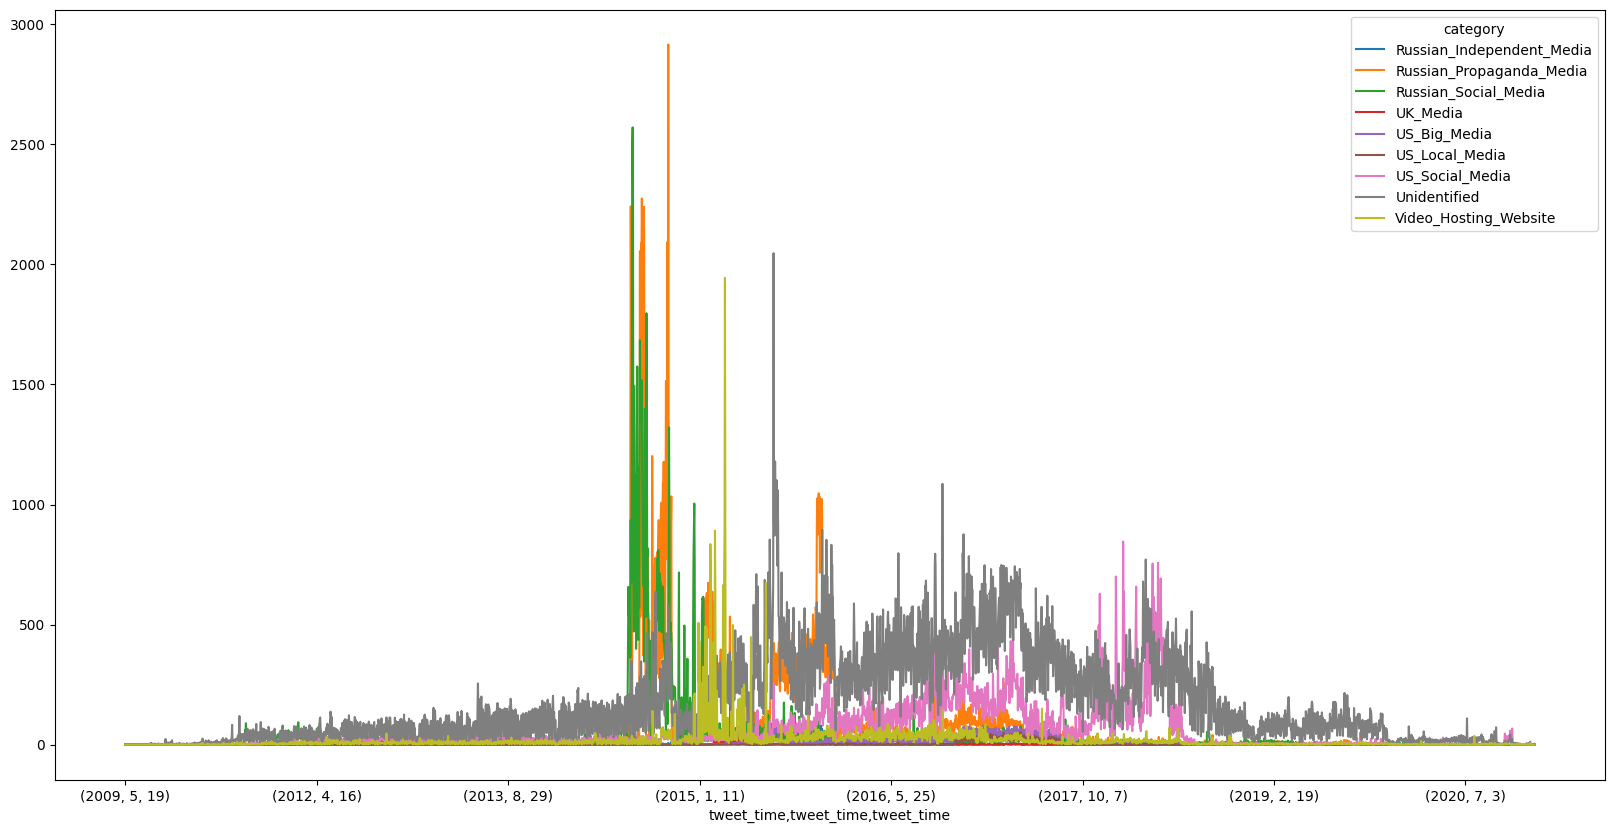

In [78]:
pivot_df_day.plot(figsize=(20,10))

In [83]:
pivot_df = pivot_df_day.copy()

In [84]:
pivot_df.to_csv('all_data.csv')

In [85]:
df

,tweetid,userid,tweet_time,urls,new_urls,category
0,269795552563191808,F05zyhmf5zjcBKHB1v3qH1MWcwhc0qj4YhEnEPEuU0=,2012-11-17 13:34:00,http://www.gq.com/moty/2012/rihanna-cover-stor...,www.gq.com,Unidentified
1,353418303718440961,FDAiQiDNukYhjuXtuoj8oXCk9DaeuDk6dWKCID+Kscc=,2013-07-06 07:41:00,http://shar.es/A6OUP,shar.es,Unidentified
2,367158974702825472,FDAiQiDNukYhjuXtuoj8oXCk9DaeuDk6dWKCID+Kscc=,2013-08-13 05:41:00,http://www.newsday.co.zw/2013/08/13/zifa-engag...,www.newsday.co.zw,Unidentified
3,899263418393395200,3404278978,2017-08-20 13:34:00,https://im-moscow.ru/about/windows,im-moscow.ru,Unidentified
4,989765727698612224,3404278978,2018-04-27 07:18:00,https://im-moscow.ru/about/landscape,im-moscow.ru,Unidentified
...,...,...,...,...,...,...
1357458,1214198784055545856,bNO7ey5HADuZDOHck3BjCy4ICubjYqkOmmTJZ+C2po4=,2020-01-06 14:55:00,https://habarirdc.net/savourer-delicieuses-sau...,habarirdc.net,Unidentified
1357459,1324733585966944258,Kms+x6qFsjBkCSCWZdXRU0wEul1HVMpX2nTRl8S2+IY=,2020-11-06 15:21:00,https://ajel.sa/KVtC5S/,ajel.sa,Unidentified
1357460,1325773129151619074,k67xbLRsLJyAVjTJOZI9QmmdPzOUCU1vWrg1ZFbRa8=,2020-11-09 12:12:00,https://twitter.com/richimedhurst/status/13256...,twitter.com,US_Social_Media
1357461,1304461702604361728,k67xbLRsLJyAVjTJOZI9QmmdPzOUCU1vWrg1ZFbRa8=,2020-09-11 16:48:00,https://twitter.com/DashCamTwats/status/130398...,twitter.com,US_Social_Media


In [86]:
df.to_csv('category_data.csv')